[The Way, the truth, and the Life](http://www-cs.engr.ccny.cuny.edu/~zhu/CitySeeds/VisionProjects/Vision-Projects-Ideas.html)

It's tough to cross the street of NYC, and even more so for a blind person. Finding zebra crossing (the way), making sure it's truly your turn (the truth), is a matter of life and death in NYC (the life!). Watch [How Blind People Cross The Street Alone](https://www.youtube.com/watch?v=48DqdwzftnQ&vl=es).  Would you help a blind person cross the street by developing a zebra crossing detection and localization algorithm? Here are some images you can start with.

# Purpose and Steps

Detect a zebra crossing

Direction (0° center line of the zebra crossing)
-Implementation is a proof of concept using a pre-recorded to demonstrate an app can conduct this live.

# Solutions
Machine learning to learn zebra crossings is doable, but intensive

Geometric solution is algorithmically challenging

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html

In [ ]:
import numpy as np
import cv2
import glob

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('testImages/*.jpg')


print(len(images))

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)
    print(ret)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

#cv2.destroyAllWindows()

https://pypi.org/project/pyzbar/

In [ ]:
from pyzbar import pyzbar
import cv2
import argparse

# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="path to input image")
# args = vars(ap.parse_args())

#image = cv2.imread(args["testImages/zebra-crossing-l.jpg"])
image = cv2.imread("testImages/noBarcode.jpg")

# find the barcodes in the image and decode each of the barcodes
barcodes = pyzbar.decode(image)

# loop over the detected barcodes
for barcode in barcodes:
	# extract the bounding box location of the barcode and draw the
	# bounding box surrounding the barcode on the image
	(x, y, w, h) = barcode.rect
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
	# the barcode data is a bytes object so if we want to draw it on
	# our output image we need to convert it to a string first
	barcodeData = barcode.data.decode("utf-8")
	barcodeType = barcode.type
	# draw the barcode data and barcode type on the image
	text = "{} ({})".format(barcodeData, barcodeType)
	cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (0, 0, 255), 2)
	# print the barcode type and data to the terminal
	print("[INFO] Found {} barcode: {}".format(barcodeType, barcodeData))
# show the output image
cv2.imshow("Image", image)
cv2.waitKey(0)

In [12]:
import numpy as np
import argparse
import cv2

def detect(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(np.float32(image), cv2.COLOR_BGR2GRAY)
    # compute the Scharr gradient magnitude representation of the images
    # in both the x and y direction
    gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
    gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)
    # subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)
    # blur and threshold the image
    blurred = cv2.blur(gradient, (9, 9))
    (_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)
    # construct a closing kernel and apply it to the thresholded image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    # perform a series of erosions and dilations
    closed = cv2.erode(closed, None, iterations = 4)
    closed = cv2.dilate(closed, None, iterations = 4)
    # find the contours in the thresholded image
    (cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    # if no contours were found, return None
    if len(cnts) == 0:
        return None
    # otherwise, sort the contours by area and compute the rotated
    # bounding box of the largest contour
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(rect))
    # return the bounding box of the barcode
    return box

In [3]:

# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required = True, help = "path to the image file")
#args = vars(ap.parse_args())

#image = cv2.imread(args['testImages/noBarcode.jpg'])
image = cv2.imread('testImages/noBarcode.jpg')
box = detect(image)
print(box)

None


In [28]:
import numpy as np
import argparse
import cv2
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required = True, help = "path to the image file")
#args = vars(ap.parse_args())

#image = cv2.imread(args['testImages/noBarcode.jpg'])
image = cv2.imread('testImages/zebra-crossing-1.jpg')
print(len(image))
box = detect(image)
print(box)
#cv2.imshow('Original Image',image)
#cv2.imshow('testImages/zebra-crossing-l.jpg',detectedImage)

396
[[579 227]
 [355 215]
 [361 106]
 [585 118]]


396


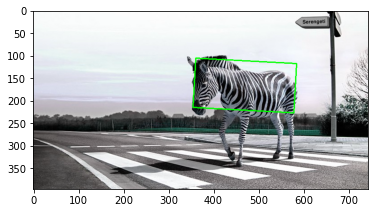

In [29]:
import matplotlib.pyplot as plt
sampImg = cv2.drawContours(image, [box], -1, (0, 255, 0), 2)
print(len(sampImg))
plt.imshow(sampImg)

567


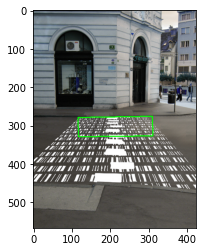

In [31]:
image = cv2.imread('testImages/zebra-crossing-4.jpg')
print(len(image))
box = detect(image)
sampImg = cv2.drawContours(image, [box], -1, (0, 255, 0), 2)

plt.imshow(sampImg)

298


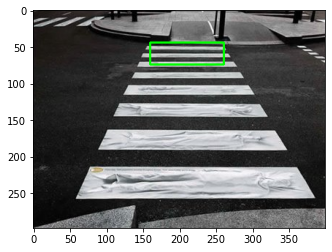

In [32]:
image = cv2.imread('testImages/zebra-crossing-3.jpg')
print(len(image))
box = detect(image)
sampImg = cv2.drawContours(image, [box], -1, (0, 255, 0), 2)

plt.imshow(sampImg)

429
None


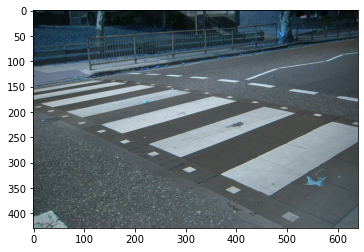

In [39]:
image = cv2.imread('testImages/zebra-crossing-2.jpg')
print(len(image))

if box:
    sampImg = cv2.drawContours(image, [box], -1, (0, 255, 0), 2)
    plt.imshow(sampImg)
else:
    print(box)
    plt.imshow(image)

338
None


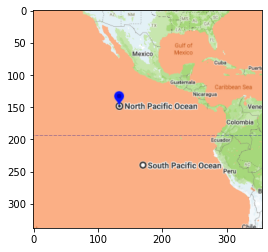

In [44]:
image = cv2.imread('testImages/noBarcode.jpg')
print(len(image))

if box:
    sampImg = cv2.drawContours(image, [box], -1, (0, 255, 0), 2)
    plt.imshow(sampImg)
else:
    print(box)
    plt.imshow(image, cmap ='brg')
    cv2.imshow('Image',image)